In [1]:
!pip install plotly

In [3]:
pip install us

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objs as go

In [7]:
data = pd.read_csv('zara.csv')
data.head()

,product_id,product_position,promotion,seasonal,sales_volume,sku,name,price,product_category,section
0,185102,Aisle,No,No,2823,272145190-250-2,Basic puffer jacket,19.99,Jackets,MAN
1,188771,Aisle,No,No,654,324052738-800-46,Tuxedo jacket,169.00,Jackets,MAN
2,180176,End-cap,Yes,Yes,2220,335342680-800-44,Slim fit suit jacket,129.00,Jackets,MAN
3,112917,Aisle,Yes,Yes,1568,328303236-420-44,Stretch suit jacket,129.00,Jackets,MAN
4,192936,End-cap,No,Yes,2942,312368260-800-2,Double faced jacket,139.00,Jackets,MAN


<p style="font-family: 'Arial', sans-serif; font-size: 20px; font-weight: 500;">Business problems that can be solved using this dataset:</p>




    1. Sales Performance Analysis: Which products are excelling in sales, and which are underperforming
    2. Profit Margin Analysis: Does the profit margin significantly impact sales?
    3. Efficiency of Sales Methods: Which sales product position is more effective Front of Store, Aisle or End - Cap?
    4. Price Optimization: Is there a specific price range that achieves better sales than others?
    5. Product Portfolio Optimization I: Determine which products are most profitable, segmented by Product Position.
    6. Predictive Sales Analysis: Develop a forecast for monthly sales.

<p style="font-family: 'Arial', sans-serif; font-size: 20px; font-weight: 500;">Performing Exploratory Data Analysis (EDA)</p>

In [40]:
# Show dataframe shape
data.shape

(252, 10)

In [42]:
#Duplicate Rows
data.duplicated().sum()

0

In [44]:
#Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        252 non-null    int64  
 1   product_position  252 non-null    object 
 2   promotion         252 non-null    object 
 3   seasonal          252 non-null    object 
 4   sales_volume      252 non-null    int64  
 5   sku               252 non-null    object 
 6   name              251 non-null    object 
 7   price             252 non-null    float64
 8   product_category  252 non-null    object 
 9   section           252 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 19.8+ KB


In [46]:
# Show the null values
data.isnull().sum()

product_id          0
product_position    0
promotion           0
seasonal            0
sales_volume        0
sku                 0
name                1
price               0
product_category    0
section             0
dtype: int64

In [48]:
# Overview of the data head
data.head()

,product_id,product_position,promotion,seasonal,sales_volume,sku,name,price,product_category,section
0,185102,Aisle,No,No,2823,272145190-250-2,Basic puffer jacket,19.99,Jackets,MAN
1,188771,Aisle,No,No,654,324052738-800-46,Tuxedo jacket,169.00,Jackets,MAN
2,180176,End-cap,Yes,Yes,2220,335342680-800-44,Slim fit suit jacket,129.00,Jackets,MAN
3,112917,Aisle,Yes,Yes,1568,328303236-420-44,Stretch suit jacket,129.00,Jackets,MAN
4,192936,End-cap,No,Yes,2942,312368260-800-2,Double faced jacket,139.00,Jackets,MAN


In [50]:
# Overview of the data tail
data.tail()

,product_id,product_position,promotion,seasonal,sales_volume,sku,name,price,product_category,section
247,159182,Front of Store,Yes,No,1014,321993245-500-2,Faux leather oversized jacket limited edition,169.00,Jackets,MAN
248,199233,Aisle,Yes,No,2222,330590505-500-2,Contrasting patches bomber jacket,159.00,Jackets,MAN
249,137044,Aisle,No,Yes,2534,320680326-107-39,Patch bomber jacket,12.99,Jackets,MAN
250,154736,Front of Store,Yes,Yes,1466,311292244-800-39,Cropped bomber jacket limited edition,19.90,Jackets,MAN
251,141434,Front of Store,No,Yes,2870,311307610-400-39,Faux leather puffer jacket,39.90,Jackets,MAN


In [52]:
# # Remove non-numeric characters from the columns
data['sales_volume'] = data['sales_volume'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
data['price'] = data['price'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)

<p style="font-family: 'Arial', sans-serif; font-size: 20px; font-weight: 500;">Sales Performance Analysis: Which products are excelling in sales, and which are underperforming?</p>

In [57]:
# First lets find out the total revenue
total_revenue = data['sales_volume'].sum()
total_revenue

459573.0

In [199]:
# Aggregating total sales and units sold for each product
product_sales = data.groupby('product_category').agg({'sales_volume': 'sum'}).reset_index()

# Sorting products by total sales in descending order to identify top-performing products
top_performing_products = product_sales.sort_values(by='sales_volume', ascending=False).head()

# Displaying the results
print("Top-Performing Products:")
top_performing_products

Top-Performing Products:


,product_category,sales_volume
0,Jackets,259468.0
3,Sweaters,75242.0
2,Shoes,57906.0
4,T-shirts,53637.0
1,Jeans,13320.0


In [63]:
# Sorting products by total sales in ascending order to identify underperforming products
underperforming_products = product_sales.sort_values(by='sales_volume', ascending=True).head()

print("\nUnderperforming Products:")
underperforming_products


Underperforming Products:


,product_category,sales_volume
1,Jeans,13320.0
4,T-shirts,53637.0
2,Shoes,57906.0
3,Sweaters,75242.0
0,Jackets,259468.0


<p style="font-family: 'Arial', sans-serif; font-size: 13px; font-weight: 10;">Insights: Jackets are the highest sold products with sales of 259,468 and the most underperforming products is Jeans with sales of 13,320</p>

<p style="font-family: 'Arial', sans-serif; font-size: 20px; font-weight: 500;">Profit Margin Analysis: Does the Opearing profit significantly impact sales?</p>

In [86]:
# We can answer the above question in the traditional long way using tables and graphs or we can also find the correlation between the Operating profit and Total Sales, if it is positive, the answer to the question is yes, and vice versa.

# Correlation bewtween Operating Profit and Total Sales
correlation = data['Operating Profit'].corr(data['sales_volume'])
correlation

KeyError: 'Operating Profit'

<p style="font-family: 'Arial', sans-serif; font-size: 20px; font-weight: 500;">Efficiency of Sales Methods: Which sales product position is more effective Front of Store, Aisle or End - Cap?</p>

In [92]:
# Finding the unique column in the df

sales_method_col = data['product_position']
unique_sales_method_col = sales_method_col.unique()
unique_sales_method_col

array(['Aisle', 'End-cap', 'Front of Store'], dtype=object)

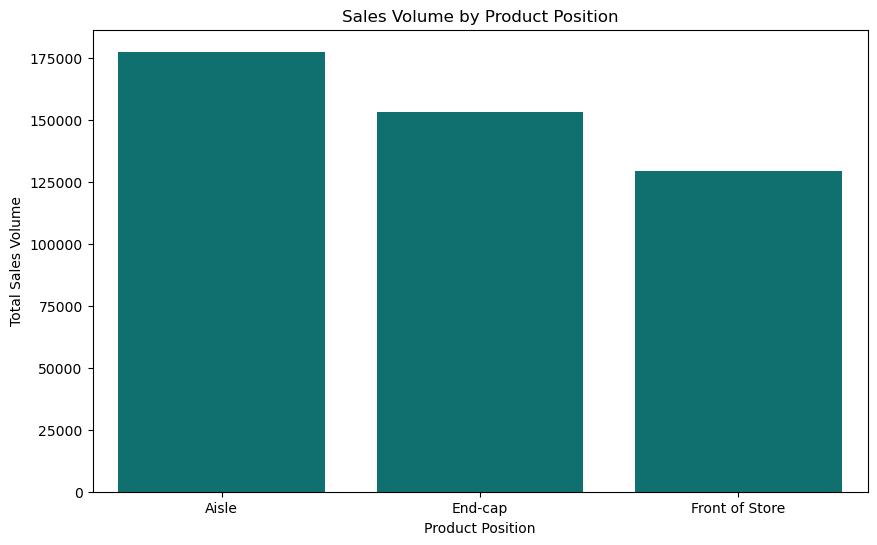

In [162]:
sales_by_position = data.groupby('product_position')['sales_volume'].sum().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='product_position', y='sales_volume', data=sales_by_position, color='teal')  # Use 'color' instead of 'palette'
plt.title('Sales Volume by Product Position')
plt.xlabel('Product Position')
plt.ylabel('Total Sales Volume')
plt.show()

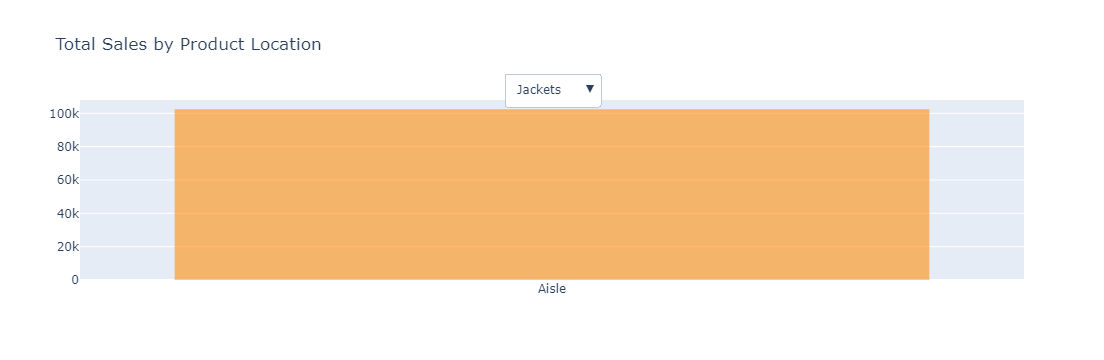

In [160]:
data['sales_volume'] = data['sales_volume'].replace('', '', regex=True).astype(float)

# Initialize the figure
fig = go.Figure()

# List of unique products and sales methods
products = data['product_category'].unique()
sales_methods = data['product_position'].unique()

# Define a subdued color palette
color_palette = {
    'Front of Store': 'rgba(93, 164, 214, 0.6)',  # Light blue
    'Aisle': 'rgba(255, 144, 14, 0.6)',          # Light orange
    'End-cap': 'rgba(44, 160, 44, 0.6)'          # Light green
}

# Add traces for each combination of product and sales method
for product_category in products:
    for product_position in sales_methods:
        filtered_df = data[(data['product_category'] == product_category) & (data['product_position'] == product_position)]
        location_sales = filtered_df.groupby('product_position')['sales_volume'].sum().reset_index()

        fig.add_trace(
            go.Bar(
                x=location_sales['product_position'],
                y=location_sales['sales_volume'],
                name=f"{product_category} - {product_position}",
                visible=False,  # Initially, all traces are hidden
                marker=dict(color=color_palette.get(product_position, 'rgba(0, 0, 0, 0.6)'))  # Default to black if not found
            )
        )

# Update layout with dropdown menu for product categories only
product_category_buttons = [
    {'label': product_category, 'method': 'update', 'args': [{'visible': [trace.name.startswith(product_category) for trace in fig.data]}]}
    for product_category in products
]

fig.update_layout(
    updatemenus=[
        {
            'buttons': product_category_buttons,
            'direction': 'down',
            'showactive': True,
            'x': 0.5,
            'xanchor': 'center',
            'y': 1.15,
            'yanchor': 'top'
        }
    ],
    title="Total Sales by Product Location",
    barmode='group'
)

# Initially displaying the first product category
if fig.data:
    fig.data[0].visible = True

fig.show()

In [205]:
data['sales_volume'] = data['sales_volume'].replace('', '', regex=True).astype(float)
data['price'] = data['price'].replace('', '', regex=True).astype(float)

# Segmenting and aggregating data by 'product_position'
sales_method_grouped = data.groupby('product_position').agg({
    'sales_volume': 'sum',
    'price': 'sum'
})

# Calculating Gross Margin
sales_method_grouped['gross_margin'] = (sales_method_grouped['sales_volume'] - sales_method_grouped['price']) / sales_method_grouped['sales_volume']
# Assuming `sales_method_grouped` is your DataFrame
sales_method_grouped = sales_method_grouped.drop(columns=['price'])
# Display the result
print(sales_method_grouped)

                  sales_volume  gross_margin
product_position                            
Aisle                 177396.0      0.951452
End-cap               152930.0      0.954294
Front of Store        129247.0      0.952543


<p style="font-family: 'Arial', sans-serif; font-size: 14px; font-weight: 500;">Interpreting the above table in words for easier understanding</p>

<p style="font-family: 'Arial', sans-serif; font-size: 12px; font-weight: 500;">
    1. Total Sales Volume: <br>
    &nbsp;&nbsp;&nbsp;&nbsp; <strong><em>Aisle:</em></strong> <strong><em>133,396</em></strong> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; <strong><em>End-Cap:</em></strong> <strong><em>152,930</em></strong> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; <strong><em>Front of Store:</em></strong> <strong><em>129,247</em></strong> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; Aisle has the highest total sales, followed by End-Cap and Front of Store.
    <br><br>
    2. Gross Margin (Total Sales Volume minus Price and divided by Total Sales Volume): <br>
    &nbsp;&nbsp;&nbsp;&nbsp; <strong><em>End-Cap:</em></strong> <strong><em>0.954294</em></strong> (or <strong><em>95.42%</em></strong>) <br>
    &nbsp;&nbsp;&nbsp;&nbsp; <strong><em>Front of Store:</em></strong> <strong><em>0.952543</em></strong> (or <strong><em>95.25%</em></strong>) <br>
    &nbsp;&nbsp;&nbsp;&nbsp; <strong><em>Aisle:</em></strong> <strong><em>0.951452</em></strong> (or <strong><em>95.14%</em></strong>)
</p>
